# CS 613 - Machine Learning

# Assignment 2 - Classification

Name <br>
CS 613 Machine Learning <br>
Fall 2021 <br>
Dr. Edward Kim <br>
Drexel University <br>

## Introduction

In this assignment you will perform classification using Logistic Regression, Naive Bayes and Decision Tree classifiers.  You will run your implementations on  a binary class dataset and report your results.

You may __NOT__ use any functions from a ML library in your code unless explicitly told otherwise.

## Submission
For your submission, upload to Blackboard a single zip file containing:
1.  PDF Writeup and PDF of Jupyter Notebook (can be the same PDF)
2.  Python notebook Code

The PDF document should contain the following at the top:

__1. Answers to Theory Questions__

_1.1_
- a. What is the sample entropy, 𝐻(𝑌) from this training data (using log base 2) (2pts)?
- b. What are the information gains for branching on variables $x_1$ and $x_2$ (2pts)? <br>
- c. Draw the decision tree that would be learned by the ID3 algorithm without pruning from this training data (3pts)?


_1.2_
- a. What are the class priors, $P(A=Yes), P(A=No)$? (2pt)
- b. Find the parameters of the Gaussians necessary to do Gaussian Naive Bayes classification on this decision to give an A or not.  Standardize the features first over all the data together so that there is no unfair bias towards the features of different scales (2pts).
- c. Using your response from the prior question, determine if an essay with 242 characters and an average word length of 4.56 should get an A or not (3pts).


_1.3_
- a. How could you use a validation set to determine the user-defined parameter $k$?

__2. Requested Logistic Regression thetas and plots__

__3. Requested Classification Statistics__
> precision: <br>
> recall: <br>
> f1_score: <br>
> accuracy: <br>


__4. Requested Classification Statistics__
> precision: <br>
> recall: <br>
> f1_score: <br>
> accuracy: 

__5. Requested Classification Statistics__
> precision: <br>
> recall: <br>
> f1_score: <br>
> accuracy: <br>


## Datasets

### Iris Dataset  (sklearn.datasets.load_iris)

The Iris flower data set or Fishers Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

The iris data set is widely used as a beginner's dataset for machine learning purposes. The dataset is included in the machine learning package Scikit-learn, so that users can access it without having to find a source for it. The following python code illustrates usage.

```
from sklearn.datasets import load_iris
iris = load_iris()
```

### Spambase Dataset  (spambase.data)

This dataset consists of 4601 instances of data, each with 57 features and a class label designating if the sample is spam or not.
The features are _real valued_ and are described in much detail here:

> https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names

Data obtained from:  https://archive.ics.uci.edu/ml/datasets/Spambase

#### Imports

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris 
import random as rand
import requests as req
from numpy import log as ln
from math import exp
from math import sqrt
from math import pi
from collections import Counter
import math


import matplotlib as mpl

from pprint import pprint
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from scipy.special import logsumexp

## 1 Theory

__1__ Consider the following set of training examples for an unknown target function:  $(x_1, x_2)\rightarrow y$

In [39]:
theory_data1 = pd.DataFrame({
   "Y" : ['+', '+', '+', '+', '-', '-', '-', '-'], 
    "x1" : ['T', 'T', 'F', 'F', 'T', 'T', 'F', 'F'],
    "x2" : ['T', 'F', 'T', 'F', 'T', 'F', 'T', 'F'],
    "Count" : [3, 4, 4, 1, 0, 1, 3, 5]
})
theory_data1['Y'] = abs(theory_data1['Y'].astype('category').cat.codes - 1)
theory_data1

,Y,x1,x2,Count
0,1,T,T,3
1,1,T,F,4
2,1,F,T,4
3,1,F,F,1
4,0,T,T,0
5,0,T,F,1
6,0,F,T,3
7,0,F,F,5


a. What is the sample entropy, $H(Y)$ from this training data (using log base 2) (2pts)? <br>

H(Y) = -(12/21log2(12/21) + 9/21log2(9/21)) = 0.985



b. item What are the information gains for branching on variables $x_1$ and $x_2$ (2pts)? <br>

E(x1) = 8/21(-7/8log2(7/8) - 1/8log2(1/8)) + 13/21(-5/13log2(5/13) - 8/13LOG2(8/13) = 0.802

IG(x1) = 0.985 - 0.802 = 0.183

E(x2) = 10/21(-7/10log2(7/10) - 3/10log2(3/10)) + 11/21(-5/11log2(5/11) - 6/11log2(6/11)) = 0.939

IG(x2) = 0.985 - 0.939 = 0.046

c. item Draw the deicion tree that would be learned by the ID3 algorithm without pruning from this training data (3pts)?

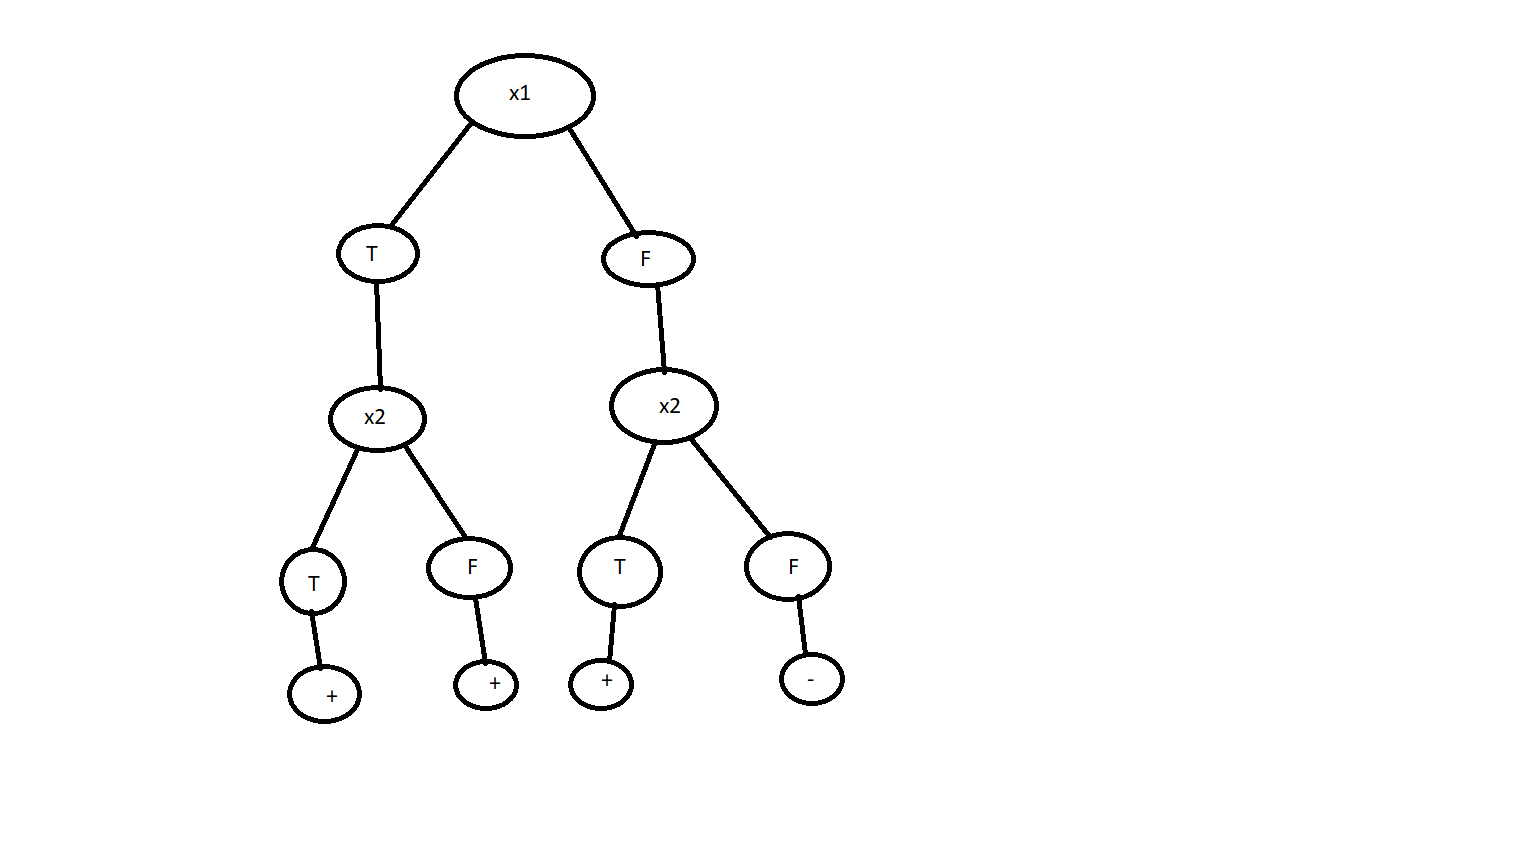

---
__2__ 

We decided that maybe we can use the number of characters and the average word length an essay to determine if the student should get an $A$ in a class or not.  Below are five samples of this data:

In [40]:
theory_data2 = pd.DataFrame({
    "# of Chars" : [216, 69, 302, 60, 393],
    "Average Word Length" : [5.68, 4.78, 2.31, 3.16, 4.2],
    "Give an A" : ['Yes', 'Yes', 'No', 'Yes', 'No']})
theory_data2['bool'] = theory_data2['Give an A'].astype('category').cat.codes
theory_data2

,# of Chars,Average Word Length,Give an A,bool
0,216,5.68,Yes,1
1,69,4.78,Yes,1
2,302,2.31,No,0
3,60,3.16,Yes,1
4,393,4.20,No,0


a. What are the class priors, $P(A=Yes), P(A=No)$? (2pt)

P(A = Yes) = 3/5 = 0.6

P(A = No) = 2/5 = 0.4

b. Find the parameters of the Gaussians necessary to do Gaussian Naive Bayes classification on this decision to give an A or not.  Standardize the features first over all the data together so that there is no unfair bias towards the features of different scales (2pts).

Yes:
*   Prior: 0.6
*   Character #:
  *   mean: -0.716
  *   σ: 0.551
*   Average Word Length:
  *   mean: 0.434
  *   σ: 0.879





No:
*   Prior: 0.4
*   Character #:
    *  mean: 1.074
    *  σ: 0.551
*   Average Word Length:
    *  mean: -0.650
    *  σ: 0.797



c. Using your response from the prior question, determine if an essay with 242 characters and an average word length of 4.56 should get an A or not (3pts).

Yes = 0.6 * 0.150 * 0.453 = 0.041

No = 0.4 * 0.077 * 0.193 = 0.006

The essay should get an A

---
__3__

Consider the following questions pertaining to a k-Nearest Neighbors algorithm (1pt):

a. How could you use a _validation set_ to determine the user-defined parameter $k$?


Start with k=1 then look for the k value that has the best precision and recall

---
---

## 2 Logistic Regression

Let's train and test a _Logistic Regression Classifier_ to classify flowers from the Iris Dataset.

First download import the data from sklearn.datasets.  As mentioned in the Datasets area,  The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.  We will map this into a binary classification problem between Iris setosa versus Iris virgincia and versicolor.  We will use just the first 2 features, width and length of the sepals.  

For this part, we will be practicing gradient descent with logistic regression.

Use the following code to load the data, and binarize the target values.

```
iris = skdata.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1
```

__Write a script that:__


1. Reads in the data with the script above.
2. Standardizes the data using the mean and standard deviation
3. Initialize the parameters of $\theta$ using random values in the range [-1, 1]
4. Do __batch__ gradient descent
5.  Terminate when absolute value change in the loss on the data is less than $2^{-23}$, or after $10,000$ iterations have passed (whichever occurs first).
6.  Use a learning rate $\eta=0.01$.
7. While the termination criteria (mentioned above in the implementation details) hasn't been met <br>
 a. Compute the loss of the data using the logistic regression cost<br>
 b. Update each parameter using __batch__ gradient descent<br>
 
Plot the data and the decision boundary using matplotlib.  Verify your solution with the LogisticRegression sklearn method.

```
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(penalty='none',solver='lbfgs',max_iter=10000)
lgr.fit(X,y)
```

In your writeup, present the thetas from gradient descent that minimize the loss function as well as plots of your method versus the built in LogisticRegression method.

---

In [41]:
def standardize(data):
  #get mean and std deviation
  mean = np.mean(data, axis=0)
  std = np.std(data, axis=0, ddof=1)
  #standardize data
  stddata = (data - mean)/std
  return stddata

def addBias(data):
  #get the shape
  m,n = np.shape(data)
  #create a column of zeros size m
  thetazero = np.ones((m, 1))
  #add that to the data
  XMat = np.hstack((thetazero, data))
  return XMat

def hypothesize(thetas, data):
  #hypothesis for logistic regression
  hyp = 1 / (1 + (np.power(np.e,-(data @ thetas))))
  return hyp

def accuracy(hyp, targety):
  m = np.shape(hyp)
  count = 0
  for i in range(0, m[0]):
    #count accuracy for all right predictions compared with test
    if hyp[i] >= 0.5 and targety[i] >= 0.5 or hyp[i] < 0.5 and targety[i] < 0.5:
      count += 1
  acc = count / m[0]
  return acc

def recall(hyp, targety):
  m = np.shape(hyp)
  tp = 0
  fn = 0
  for i in range(0, m[0]):
    #increment true positive
    if hyp[i] >= 0.5 and targety[i] >= 0.5:
      tp += 1
    #increment false negative
    elif hyp[i] < 0.5 and targety[i] >= 0.5:
      fn+= 1
  #calculate recall
  rcl = tp / (tp+fn)
  return rcl
      
def precision(hyp, targety):
  m = np.shape(hyp)
  tp = 0
  fp = 0
  for i in range(0, m[0]):
    #increment true positive
    if hyp[i] >= 0.5 and targety[i] >= 0.5:
      tp += 1
    #increment false positive
    elif hyp[i] >= 0.5 and targety[i] < 0.5:
      fp+= 1
  prc = tp / (tp+fp)
  return prc

def f_measure(precision, recall):
  return((2*precision*recall)/(precision+recall))

  
def RMSEF(y, y_hat):
  return np.sqrt(np.sum((y - y_hat) ** 2) / len(y))

In [42]:
iris = load_iris()
x = iris.data[:,:2]
targety = (iris.target != 0) * 1
x = standardize(x)
XMat = addBias(x)
m, n = np.shape(XMat)

In [43]:
learningrate = 0.01
iterations = 10000
np.random.seed(0)
thetas = np.random.randn(n) * np.sqrt(2. / n)

In [44]:
for i in range(iterations):
  hyp = hypothesize(thetas, XMat)
  loss =  targety - hyp
  gradient = np.dot(XMat.T ,loss)
  thetas +=  (learningrate/m) * gradient

In [45]:
lgr = LogisticRegression(penalty = 'none' , solver = 'lbfgs' , max_iter = 10000)
lgr.fit(XMat, targety)
skthetas = lgr.coef_
skthetas

array([[ 23.65086457,  71.20787484, -33.85885804]])

My plot

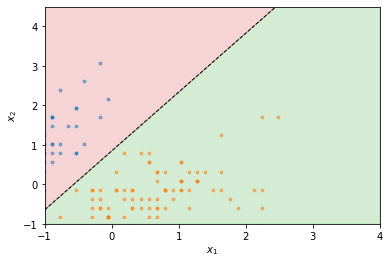

In [46]:
# Retrieve the model parameters.
b = thetas[0]
w1, w2 = thetas[1:].T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = -1, 4
ymin, ymax = -1, 4.5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:green', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:red', alpha=0.2)

plt.scatter(*x[targety==0].T, s=8, alpha=0.5)
plt.scatter(*x[targety==1].T, s=8, alpha=0.5)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

plt.show()

sklearn plot

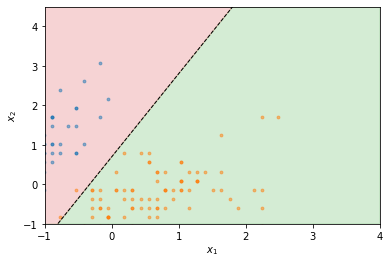

In [47]:
# Retrieve the model parameters.
b = skthetas[0][0]
w1, w2 = skthetas[0][1:].T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = -1, 4
ymin, ymax = -1, 4.5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:green', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:red', alpha=0.2)

plt.scatter(*x[targety==0].T, s=8, alpha=0.5)
plt.scatter(*x[targety==1].T, s=8, alpha=0.5)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

plt.show()

---
---

## 3 Logistic Regression Spam Classification 

Let's train and test a _Logistic Regression Classifier_ to classifiy Spam or Not from the Spambase Dataset.

First download the dataset _spambase.data_ from Blackboard.  As mentioned in the Datasets area, this dataset contains 4601 rows of data, each with 57 continuous valued features followed by a binary class label (0=not-spam, 1=spam).  There is no header information in this file and the data is comma separated.  

__Write a script that:__


1. Reads in the data.
2. Randomizes the data.
3. Selects the first 2/3 (round up) of the data for training and the remaining for testing (you may use  __sklearn train\_test\_split__ for this part)
4. Standardizes the data (except for the last column of course) using the training data
5. Initialize the parameters of $\theta$ using random values in the range [-1, 1]
6.  Do _batch gradient descent_
7. Terminate when absolute value change in the loss on the data is less than $2^{-23}$, or after $1,500$ iterations have passed (whichever occurs first, this will likely be a slow process).
8. Use a learning rate $\eta=0.01$.
9. Classify each testing sample using the model and choosing the class label based on which class probability is higher.
10. Computes the following statistics using the testing data results:<br>
[lecture 3 b] <br>
 a. Precision<br>
 b. Recall<br>
 c. F-measure<br>
 d. Accuracy<br>
 
__Implementation Details__

1. Seed the random number generate with zero prior to randomizing the data
2. There are a lot of $\theta$s and this will likely be a slow process

__In your report you will need__

1. The statistics requested for your Logistic classifier run.

In [48]:
url = 'https://raw.githubusercontent.com/gitparrot/MLHW2/main/spambase.data'
csvdata = pd.read_csv(url, header=None)

csvdata.iloc[:,:-1] -= np.mean(csvdata.iloc[:,:-1])
csvdata.iloc[:,:-1] /= np.std(csvdata.iloc[:,:-1])

# Splitting into training and test data
test_data = csvdata.sample(frac=0.33, random_state=0)
train_data = csvdata.drop(test_data.index)

In [49]:
m, n = train_data.shape

In [50]:
testdata = test_data.iloc[:,:-1].values
testY = test_data.iloc[:,-1].values
traindata = train_data.iloc[:,:-1].values
trainY = train_data.iloc[:,-1].values

In [51]:
XMat = addBias(traindata)
testdata = addBias(testdata)

In [52]:
learningrate = 0.01
iterations = 1500
np.random.seed(0)
thetas = np.random.randn(n) * np.sqrt(2. / n)
js = []

In [53]:
for i in range(iterations):
  hyp = hypothesize(thetas, XMat)
  loss =  trainY - hyp
  js.append(np.sum(trainY * ln(hyp + (1 - trainY)) * ln(1 - hyp)) / trainY.shape[0])
  gradient = np.dot(XMat.T,loss)
  thetas +=  (learningrate/m) * gradient
  if i > 1 and js[-2] - js[-1] < 2 ** -23:
    break

In [54]:
pred = hypothesize(thetas, testdata)

In [55]:
myacc = accuracy(pred, testY)
myrcl = recall(pred, testY)
myprc = precision(pred, testY)
myfms = f_measure(myprc,myrcl)
print('Accuracy: ',myacc)
print('Recall: ',myrcl)
print('Precision: ',myprc)
print('F-Measure: ',myfms)

Accuracy:  0.9084321475625824
Recall:  0.8552845528455284
Precision:  0.9131944444444444
F-Measure:  0.8832913518052057


---
---

## 4 Naive Bayes Classifier

Let's train and test a _Naive Bayes Classifier_ to classifiy Spam or Not from the Spambase Dataset.

First download the dataset _spambase.data_ from Blackboard.  As mentioned in the Datasets area, this dataset contains 4601 rows of data, each with 57 continuous valued features followed by a binary class label (0=not-spam, 1=spam).  There is no header information in this file and the data is comma separated.  As always, your code should work on any dataset that lacks header information and has several comma-separated continuous-valued features followed by a class id $\in {0,1}$.

__Write a script that:__

1. Reads in the data.
2. Randomizes the data.
3. Selects the first 2/3 (round up) of the data for training and the remaining for testing
4. Standardizes the data (except for the last column of course) using the training data
5. Divides the training data into two groups: Spam samples, Non-Spam samples.
6. Creates Gaussian models for each feature for each class.
7. Classify each testing sample using these models and choosing the class label based on which class probability is higher.
8. Computes the following statistics using the testing data results:<br>
 a. Precision<br>
 b. Recall<br>
 c. F-measure<br>
 d. Accuracy<br>
 
__Implementation Details__

1.  Seed the random number generate with zero prior to randomizing the data
2.  If  you  decide  to  work  in  log  space,  realize  that  python  interprets  0log0  as  inf. You  should identify this situation and either add an EPS (very small positive number) or add a very largenegative number to the log sum.

__In your report you will need:__

1.  The statistics requested for your Naive Bayes classifier run.

In [56]:
def class_seperator(data):
  #create a dictionary that is partitioned on class
	partition = dict()
  #go through data keep track of row
	for i in range(len(data)):
		row = data[i]
    #get the class id
		class_id = row[-1]
    #if we come across a new class create a new list in the dictionary with the class id as key
		if (class_id not in partition):
			partition[class_id] = list()
    #append the row contents to the dictionary list under the class id
		partition[class_id].append(row)
	return partition

def summarize(data):
  #store the mean std deviation and len of the dataset
	summaries = [(np.mean(column), np.std(column), len(column)) for column in zip(*data)]
	del(summaries[-1])
	return summaries

def class_summarizer(dataset):
  #uses class separator function to create a dictionary
	partitioned = class_seperator(dataset)
  #creates a dictionary to store summaries by class
	summary = dict()
	for classid, rows in partitioned.items():
    #store the summary in a summary dictionary
		summary[classid] = summarize(rows)
	return summary

def gpdf(x, mean, std):
  #create small number to prevent division by zero
  SMALL = np.finfo(float).eps
  #add that to mean and std
  mean += SMALL
  std += SMALL
  #calculate gaussian distribution
  exponent = exp(-((x-mean)**2 / (2 * std**2 )))
  return (1 / (sqrt(2 * pi) * std)) * exponent

def probability_func(summ, row):
  #get total rows. the summ[output][0][2] gives you the number of data for the class
	total_rows = sum([summ[output][0][2] for output in summ])
  #create dictionary to store probabilities
	probabilities = dict()
	for classid, csumm in summ.items():
    # number of rows in class divided by rows in total
		probabilities[classid] = summ[classid][0][2]/float(total_rows)
    #get mean and std from summary dict and plug them into gpdf function
		for i in range(len(csumm)):
			mean, stdev, _ = csumm[i]
			probabilities[classid] *= gpdf(row[i], mean, stdev)
	return probabilities

def predict(summaries, row):
  #get probabilites from function
	probs = probability_func(summaries, row)
  #initizialize the best label and best probability
	guess, chance = None, -1
  #update chance and guess
	for classid, probability in probs.items():
		if guess is None or probability > chance:
			chance = probability
			guess = classid
	return guess

def nb(train, test):
  #create summary dictionary
	summarize = class_summarizer(train)
  #create a list to hold predictions
	predictions = list()
	for row in test:
    #make prediction based off row and add to list
		output = predict(summarize, row)
		predictions.append(output)
	return(predictions)

In [57]:
url = 'https://raw.githubusercontent.com/gitparrot/MLHW2/main/spambase.data'
csvdata = pd.read_csv(url, header=None, index_col=False)
csvdata = csvdata.sample(frac=1, random_state=0)
csvdata.iloc[:,:-1] -= np.mean(csvdata.iloc[:,:-1])
csvdata.iloc[:,:-1] /= np.std(csvdata.iloc[:,:-1])
csvdata = csvdata.to_numpy()
csvdata = csvdata.astype(np.float)

In [58]:
m, n = csvdata.shape

In [59]:
trainrows = int((2/3)*m)
testrows = m - trainrows

In [60]:
testdata = csvdata[trainrows:]
traindata = csvdata[:trainrows]
testY = testdata[:,-1]
trainY = traindata[:,-1]

In [61]:
pred = nb(traindata, testdata)

In [62]:
myacc = accuracy(pred, testY)
myrcl = recall(pred, testY)
myprc = precision(pred, testY)
myfms = f_measure(myprc,myrcl)
print('Accuracy: ',myacc)
print('Recall: ',myrcl)
print('Precision: ',myprc)
print('F-Measure: ',myfms)

Accuracy:  0.7698826597131682
Recall:  0.9791666666666666
Precision:  0.6232044198895028
F-Measure:  0.7616475354490209


---
---

## 5  Decision Trees

Let’s train and test a Decision Tree to classify Spam or Not from the Spambase Dataset.

__Write a script that:__

1. Reads in the data.
2. Randomizes the data.
3. Selects the first 2/3 (round up) of the data for training and the remaining for testing
4. Standardizes the data (except for the last column of course) using the training data
5. Divides the training data into two groups:  Spam samples, Non-Spam samples.
6. Trains a decision tree using the ID3 algorithm without any pruning.
7. Classify each testing sample using your trained decision tree.
8. Computes the following statistics using the testing data results:<br>
 a.  Precision <br>
 b.  Recall<br>
 c.  F-measure<br>
 d.  Accuracy<br>
 
__Implementation Details__

1.  Seed the random number generate with zero prior to randomizing the data
2.  Depending on your perspective, the features are either continuous or finite discretize.  The lattercan be considered tru since the real-values are just the number of times a feature is observedin an email, normalized by some other count.  That being said, for a decision tree we normallyuse categorical or discretized features. So for the purpose of this dataset, look at therange of each feature and turn them into binary features by choosing a threshold. I suggest using the median or mean.

__In your report you will need:__ 
1.  The statistics requested for your Decision Tree classifier run.

#### Notes

_Notes hand typed from Wikipedia; nearly verbatim_

__Algorithm__

The ID3 - iterative dichotomiser 3 - is used to generate a decision tree from a dataset. ID3 is the precusor to C4.5 and is typically used in machine learning and natural language processing domains.

The ID3 algorithm begins witht the origianl set S as the root node. On each iteration of the algorithm, it iterates through every unused attribute of the set S and calculates the entropy H(Y) or the information gain IG(S) of that attribute. 

It then selects the attribute which has the smallest entropy (or largest information gain) value. The set S is then split or partitioned be the selected attribute to produce subsets of the data. For example, a node can be split into child nodes based on the subsets of the population whose ages are less than 50, between 50 and 100, and greater than 100). The algorithm continues to recurse on each subset, considering only attributes never slected before.

Recursion on a subset may stop in one of these cases:

- every element in the subset belongs to the same class; in which case the node is turned into a leaf node and labelled with the class of the examples.
- there are no more attributes to be selected, but the examples still do not belong to the same class. In this case, the node is made a leaf node and lablled with the most common class of the examples in the subset.
- ther are no examples in the subset, which happens when no example in the parent set was found to match a specific value of the selected attribute. An example could be the absence of a person among the population with age over 100 years. The leaf node is created and labelled with the most common class of the examples in the parent nodes set.

Throughout the algorithm, the decision tree is constructed with each non-terminal node (internal node) representing the selected attribute on which the data was split, and terminal nodes (leaf nodes) representing the class label of the final subset of this branch.


__Summary__
1. Calculate the entropy of every attribute $\alpha$ of $S$.
2. Partition (split) the set $S$ into subsets using the attribute for which the resulting entropy after splitting is minimized; or equivalenty, information gain is maximum.
3. Make a decision tree node containing that attribute.
4. Recurse on subsets using the remaining attributes.


__Pseudocode__

```
ID3 (Examples, Target_Attribute, Attributes)
    
    Create a root node for the tree
    
    If all examples are positive: Return the single-node tree Root with label = +
    If all examples are negative: Return the single-node tree Root with label = -
    If number of predicting attributes is empty: Return the single-node tree Root
    
    If Root not None: label = most common value of the target attribute in the example
    
    Else If Root is None:
            
            A = the attribute the best classifies the examples
            Decision Tree attribute for Root = A
            
            For value $v_i$ in A:
                Add a new tree branch below Root, correspongin to the test A = $v_i$
                Let Examples($v_i$) be the subset of examples that have the value $v_i$ for A
                If Examples($v_i$) is empty:
                    Then below this new branch add a leaf node with label = most common target value in the examples
                Else below this new branch add the subtree ID3(Examples($v_i$), Target_attribute, Attributes - {A})
    
    End
    Return Root
```

__Properties__
ID3 does not guarantee an optimal solution. It can converge on local optima. It uses a greedy strategy by selecting the locally best attribute to split the dataset on each iteration. The algorithms optimality can be improved by using backtracking during the search for the optimal decision tree at the cost of possibly taking longer.

ID3 can overfit the training data. To avoid overfitting, smaller decision trees should be preferred over larger ones. This algorithm usually produces small trees but it does not always produce the smallest tree possible.

ID3 is harder to use on continuous data than on factored data (factored data has a discrete number of possible values, thus reducing the possible barnch points). If the values of any given attribute are continuous, then there are many more places to split the data on this attribute, and searching for the best value to split on can be time consuming. 

__Usage__
ID3 is used by training on data set $S$ to produce a decision tree which is stored in memory. At runtime, this decision tree is used to classify new test cases (feature vectors) by traversing the decision tree using the features of the datum to arrive at a leaf node. The class of this terminal node is the class the test case is classified as.

In [63]:
#Node needed to build tree
class Node:
    def __init__(self, label):
 
        self.feature = None  
        self.feature_values = []  
        self.label = label   
        self.children = {}   
        self.parent_feature = None
        self.parent_feature_value = None
        self.change = False
        self.instances_labeled = []
 
# Find most common class
def popular_class(instances):
    labels = []  
    for instance in instances:
        labels.append(instance[57])

    return Counter(labels).most_common(1)[0][0]

# Calculate prior entropy
def p_ent(instances):   
    labels = []  
    for instance in instances:
        labels.append(instance[57])
    counter = Counter(labels)
    if len(counter) == 1:
        return 0
    else:
        entropy = 0
        for c, count_of_c in counter.items():
            probability = count_of_c / len(labels)
            entropy += probability * (math.log(probability, 2))
        return -entropy

# Calculate entropy
def entropy(instances, feature, feature_value):

    labels = []
 
    for instance in instances:
        if instance[feature] == feature_value:
            labels.append(instance[57])
    counter = Counter(labels)
    
    if len(counter) == 1:
        return 0
    else:
        entropy = 0
        for c, count_of_c in counter.items():
            probability = count_of_c / len(labels)
            entropy += probability * (math.log(probability, 2))
        return -entropy

# Calculate IG
def information_gain(instances, feature):
    #prior entropy
    pentropy = p_ent(instances)
 
    values = []
    #append features to a list
    for instance in instances:
        values.append(instance[feature])
    counter = Counter(values) 
    r_ent = 0
    s_info = 0
 
    for feature_value, feature_value_count in counter.items():
        probability = feature_value_count/len(values)
        #remaining entropy
        r_ent += (probability * entropy(
            instances, feature, feature_value))
        #split information
        s_info += probability * (math.log(probability, 2))
    information_gain = pentropy - r_ent
    s_info = -s_info
 
    gainratio = None
 
    if s_info != 0:
        gainratio = information_gain / s_info
    else:
        gainratio = -1000
 
    return gainratio

# Build tree using recursion    
def ID3(instances, features, default):

    if len(instances) == 0:
        return Node(default)
 
    labels = []  
    for instance in instances:
        labels.append(instance[57])
        
    # Check if we only have one class
    if len(Counter(labels)) == 1 or len(labels) == 1:
        tree = Node(popular_class(instances))
        return tree
    #find best feature
    else:
        #traverse tree and assign best feature to a node
        best_feature = find_best_feature(instances, features)
        tree = Node(popular_class(instances))
        tree.feature = best_feature
        best_feature_values = []
        for instance in instances:
            try:
                best_feature_values.append(instance[best_feature])
            except:
                no_best_feature = True
        tree.feature_values = list(set(best_feature_values))
        
        # loop through each value of the best feature (0, 1)
        for best_feat_value_i in tree.feature_values:
            instances_i = []
            for instance in instances:
                if instance[best_feature] == best_feat_value_i:
                    instances_i.append(instance)
            subtree = ID3(instances_i, features, popular_class(instances))
            subtree.instances_labeled = instances_i
            subtree.parent_feature = best_feature 
            subtree.parent_feature_value = best_feat_value_i 
            tree.children[best_feat_value_i] = subtree
 
        return tree
 
# Find the best feature to split on
def find_best_feature(instances, features):
    selected_feature = None
    max_IG = -1000
    #update information gain
    for feature in features:
        gain = information_gain(instances, feature)
        #keep track of max gain and take note of the feature associated
        if gain > max_IG:
            max_IG = gain
            selected_feature = feature
 
    return selected_feature
 
def predict_list(trained_tree, test_instances):
    pred_list = []
    # loop through each example and find the predication for it
    for test_instance in test_instances:
        pred_list.append([predict(trained_tree, test_instance), test_instance[57]])  
    return pred_list

 
def predict(node, test_instance):
    #basecase
    if len(node.children) == 0:
        return node.label
    #recurse
    else:
        feature_value = test_instance[node.feature]
        if feature_value in node.children and node.children[
            feature_value].change == False:
            return predict(node.children[feature_value], test_instance)
        else:
            instances = []
            for attr_value in node.feature_values:
                instances += node.children[attr_value].instances_labeled
            return popular_class(instances)
        

In [64]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/gitparrot/MLHW2/main/spambase.data'
csvdata = pd.read_csv(url, header=None)

csvdata.iloc[:,:-1] -= np.mean(csvdata.iloc[:,:-1])
csvdata.iloc[:,:-1] /= np.std(csvdata.iloc[:,:-1])

# Splitting into training and test data
test_data = csvdata.sample(frac=0.33, random_state=0)
train_data = csvdata.drop(test_data.index)

mean = np.mean(train_data.iloc[:,:-1])

train_data[train_data < mean] = 0
train_data[train_data >= mean] = 1
train_data = train_data.astype(np.int32)

test_data[test_data < mean] = 0
test_data[test_data >= mean] = 1
test_data = test_data.astype(np.int32)

In [65]:
default = popular_class(train_data.values)
tree = ID3(train_data.values.tolist(), train_data.iloc[:,:-1].columns.values.tolist(), default)
pred_list = predict_list(tree, test_data.values)  

In [66]:
pre_array = np.array(pred_list)
myacc = accuracy(pre_array[:,0], pre_array[:,1])
myrcl = recall(pre_array[:,0], pre_array[:,1])
myprc = precision(pre_array[:,0], pre_array[:,1])
myfms = f_measure(myprc, myrcl)
print('Accuracy: ',myacc)
print('Recall: ', myrcl)
print('Precision: ', myprc)
print('F-Measure: ', myfms)

Accuracy:  0.8814229249011858
Recall:  0.8390243902439024
Precision:  0.864321608040201
F-Measure:  0.8514851485148514
